In [1]:
import seaborn as sns
import pandas as pd
covid19= pd.read_csv('owid-covid-data.csv')

#Si richiede di verificare le dimensioni del dataset e i relativi metadati


In [2]:
covid19.shape
covid19.dtypes
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387253 entries, 0 to 387252
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387253 non-null  object 
 1   continent                                   368726 non-null  object 
 2   location                                    387253 non-null  object 
 3   date                                        387253 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

In [87]:
covid19.columns
covid19.isna().sum()

iso_code                                        0
continent                                   18527
location                                        0
date                                            0
total_cases                                 38920
                                            ...  
excess_mortality_cumulative_absolute       374081
excess_mortality_cumulative                374081
excess_mortality                           374081
excess_mortality_cumulative_per_million    374081
progressivo                                 10973
Length: 68, dtype: int64

#Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [4]:
continenti = covid19['location'].unique()
covid19['continent'].value_counts(dropna = False) # vedere quali sono e quanti sono i valori nulli

continent
Africa           87439
Europe           83569
Asia             76493
North America    62924
Oceania          36821
South America    21480
NaN              18527
Name: count, dtype: int64

#somma totale dei casi per tutti i continenti

In [5]:
casi_tot_continenti = covid19.groupby('continent').new_cases.sum()
casi_tot_continenti.sum()

775021816.0

#casi totali per continente

In [6]:
casi_per_continenti = covid19.groupby('continent').new_cases.sum()
casi_per_continenti

continent
Africa            13141282.0
Asia             301446461.0
Europe           252376812.0
North America    124530643.0
Oceania           14808170.0
South America     68718448.0
Name: new_cases, dtype: float64

#statistica dei casi globali 

In [7]:
cont1 = covid19.total_cases.describe().round()
cont1

count       348333.0
mean       7386532.0
std       43985088.0
min              1.0
25%           9448.0
50%          79713.0
75%         851668.0
max      774954379.0
Name: total_cases, dtype: float64

#Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [51]:
continenti = covid19['continent'].unique()
continenti

europa = covid19.continent == 'Europe'
europa_1 = covid19.loc[europa]
eu_percentuali = europa_1['new_cases'].describe().round().T
print(eu_percentuali)
eu =europa_1['new_cases'].sum()/ covid19[ 'new_cases'].sum()*100
asia = covid19.continent =='Asia'
asia_1 = covid19.loc[asia]
as_percentuali =asia_1['new_cases'].describe().T.round()
print(as_percentuali)
asia =asia_1['new_cases'].sum()/covid19[ 'new_cases'].sum()*100
print('La percentuale per l europa è :',eu,'-','La percentuale per l asia è :',asia)

count      77470.0
mean        3258.0
std        37058.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max      2417043.0
Name: new_cases, dtype: float64
count       72095.0
mean         4181.0
std        189112.0
min             0.0
25%             0.0
50%             0.0
75%             0.0
max      40475477.0
Name: new_cases, dtype: float64
La percentuale per l europa è : 7.683953566625948 - La percentuale per l asia è : 9.177945433226723


#•Selezionare i dati relativi all'Italia nel 2022, 
#e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data.
#Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). 
#Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, 
#e commentare se ci sono similarità con l'andamento del numero dei casi totali;

<Axes: xlabel='date'>

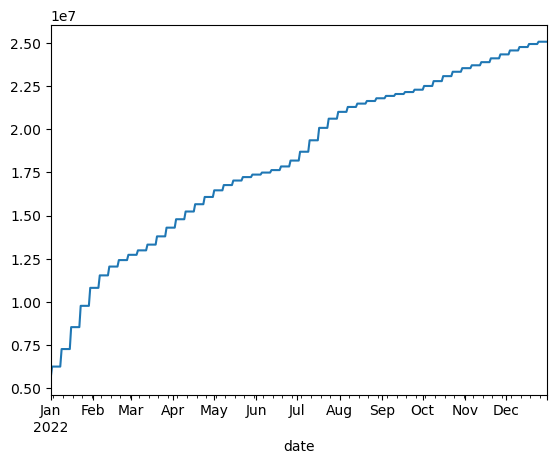

In [58]:
covid19.date = pd.to_datetime(covid19.date)
covid19.dtypes
ann2022 = covid19.date.dt.year == 2022
italia = covid19['location']=='Italy'
ita22 = ann2022 & italia
it2022 = covid19.loc[ita22]
it2022 = it2022.set_index('date')
it2022['total_cases'].plot()


<Axes: xlabel='date'>

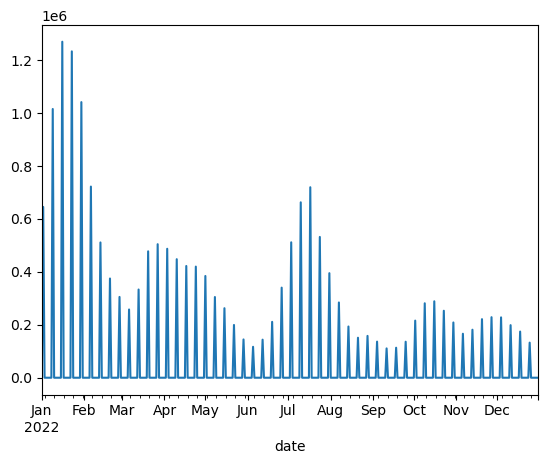

In [57]:
it2022['new_cases'].plot()

<Axes: >

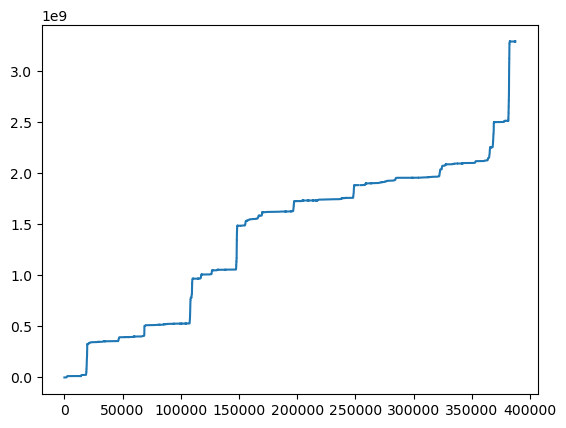

In [10]:
covid19["progressivo"] = covid19.new_cases.cumsum()
covid19.progressivo.plot(kind="line")#per tutti i casi

<Axes: xlabel='date'>

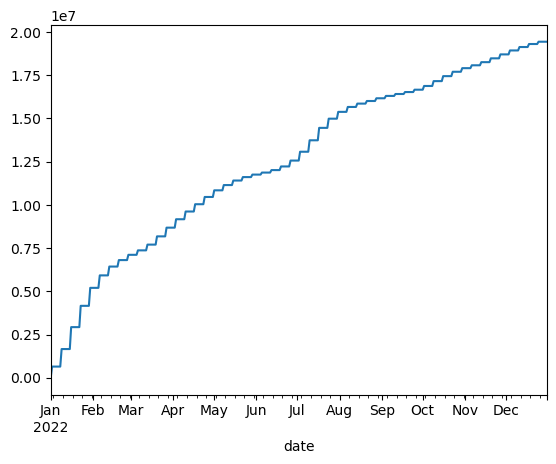

In [52]:
it2022["progressivo"] =it2022.new_cases.cumsum()
it2022.progressivo.plot(kind="line")#per i casi in Italia nel 2022

#Riguardo le nazioni di Italia, Germania e Francia,
#mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU)
#da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;

In [13]:
filtroit=covid19.location=="Italy"
filtrofr=covid19.location=="France"
filtroge=covid19.location=="Germany"
filtrosp=covid19.location == 'Spain'
filtrona = filtroit | filtrofr | filtroge
filtro_tot= covid19[filtrona &  ((covid19.date.dt.year == 2022) & (covid19.date.dt.month >= 5) | (covid19.date.dt.year == 2023) & (covid19.date.dt.month <= 4))]

<Axes: xlabel='location', ylabel='icu_patients'>

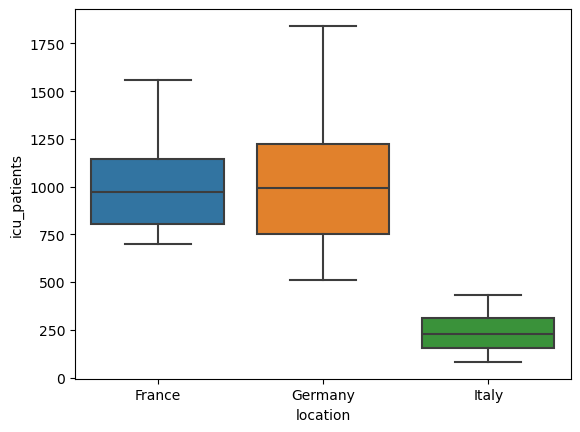

In [26]:
sns.boxplot (data=filtro_tot, x="location", y="icu_patients")

DA QUESTO GRAFICO SI DEDUCE CHE LA GERMANIA HA AVUTO PIU PAZIENTI IN TERAPIA INTENSIVA SEGUITA DALLA FRANCIA E POI L'ITALIA NEL PERIODO SELEZIONATO.


Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [15]:
filtrnazio = filtroit | filtrofr | filtroge | filtrosp
Anno23 = covid19.date.dt.year == 2023
filtronaz23 = filtrnazio & Anno23
filtro_n = covid19.loc[filtronaz23]
covid19["hosp_patients"].isna().sum() # somma dei valori nulli

347075

In [17]:
Ita23 = filtroit & Anno23
Fra23 = filtrofr & Anno23
Ger23 = filtroge & Anno23
Spa23 = filtrosp & Anno23

In [27]:
print('il totale dei pazienti in Italia è :',covid19.loc[Ita23, 'hosp_patients'].sum())
print('il totale dei pazienti in Francia è :',covid19.loc[Fra23, 'hosp_patients'].sum())
print('il totale dei pazienti in Germania è :',covid19.loc[Ger23, 'hosp_patients'].sum())
print('il totale dei pazienti in Spagna è :',covid19.loc[Spa23, 'hosp_patients'].sum())

il totale dei pazienti in Italia è : 1175272.0
il totale dei pazienti in Francia è : 1382574.0
il totale dei pazienti in Germania è : 0.0
il totale dei pazienti in Spagna è : 354602.0


In [86]:
fil2023=covid19.loc[(covid19["location"].isin(["Italy", "Germany", "France", "Spain"]))]
somma2023

location
France     33466.0
Germany        NaN
Italy      38507.0
Spain      27029.0
Name: hosp_patients, dtype: float64

CI SONO VALORI NULLI SAREBBE POSSIBILE SOSTITUIRLI CON LA MEDIA A MIO PENSIERO MA COMUNQUE SARANNO DATI FALSATI PERCHE DEFFICILE DEDURLO.


Anche se abbiamo visto prima con il grafico delle terapie intensive che la Francia e la Germania i loro dati sono quasi uguali.